In [1]:
# 加载鸢尾花数据集
from sklearn.datasets import load_iris
import pandas as pd

# 加载数据
iris = load_iris()

# 创建 DataFrame，方便查看
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # 加上分类标签

# 显示前5行
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


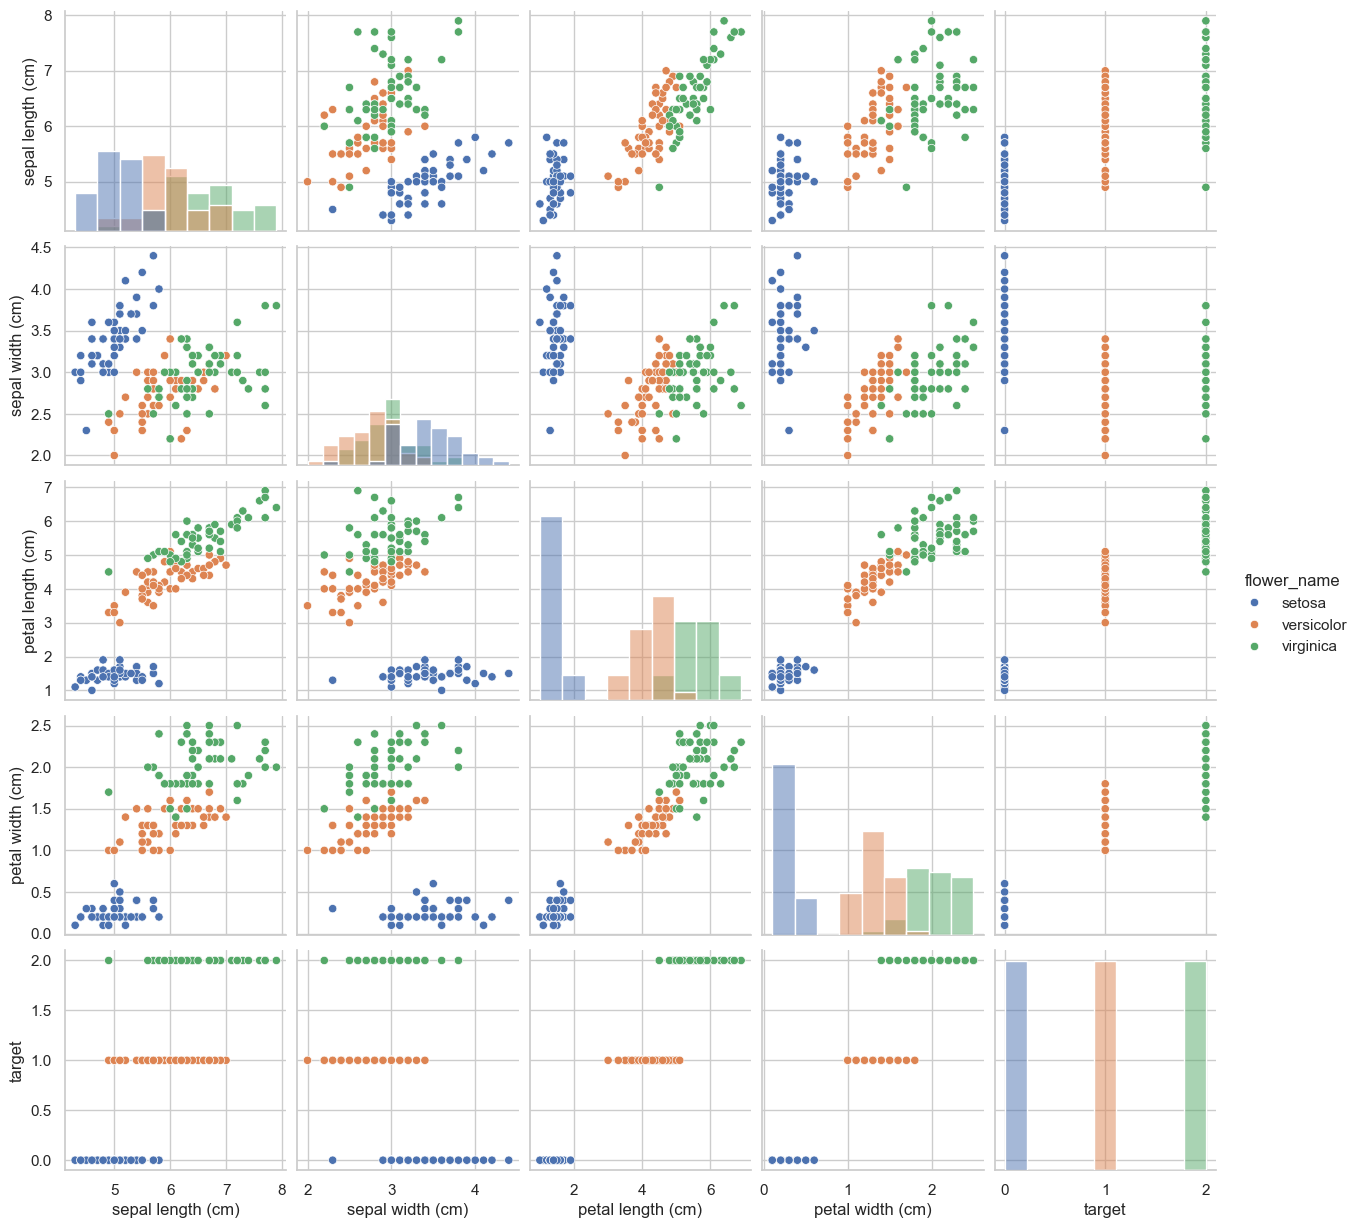

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体避免乱码（可选，Windows用户可能需要）
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

# 设置 seaborn 的默认风格
sns.set_theme(style="whitegrid")

# 把数字标签转成真实的花名（增加可读性）
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

# 画出不同特征的二维分布图
sns.pairplot(df, hue="flower_name", diag_kind="hist", height=2.5)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 特征值（前4列），作为输入
X = df[iris.feature_names]

# 目标值（类别标签），作为输出
y = df['target']

# 拆分数据：80% 训练用，20% 用来测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建模型
model = RandomForestClassifier()

# 开始训练
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 打印准确率
print("准确率：", accuracy_score(y_test, y_pred))


准确率： 1.0
